In [6]:
path = r"D:\\sentiment_analysis\\src\\data\\IMDB Dataset.csv"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

In [7]:
df = pd.read_csv(path)

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

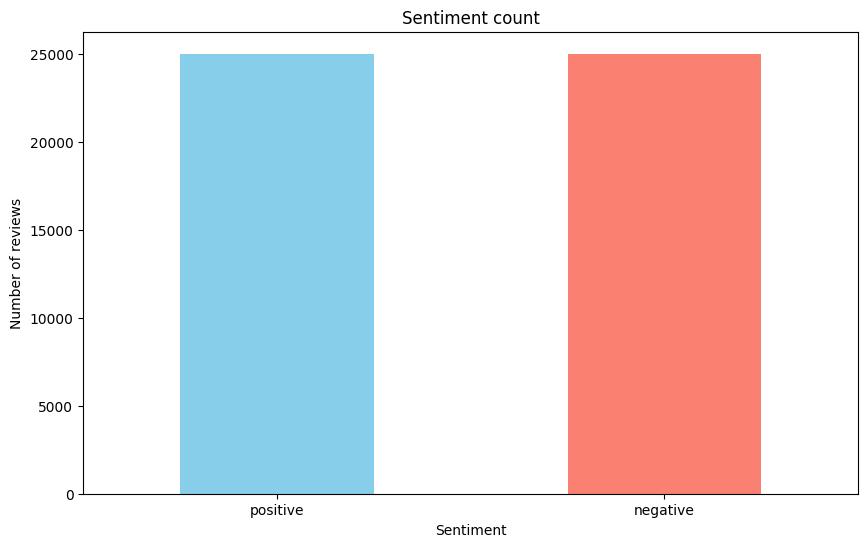

In [10]:
plt.figure(figsize=(10,6))
sentiment_counts.plot(kind='bar',color=['skyblue','salmon'])
plt.title("Sentiment count")
plt.xlabel("Sentiment")
plt.ylabel("Number of reviews")
plt.xticks(rotation=0)
plt.show()

### Replace the categorical  values with numerical values

In [11]:
df["sentiment"].replace({"positive":1,"negative":0},inplace =True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [12]:
x = np.array(df["review"].values)
y = np.array(df["sentiment"].values)

In [13]:
print(x[0])


One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

### Data preprocessing

In [30]:
# x_filtered = []
# for review in x:
#   review = review.lower()

#   punc = set('''!@#$%^&*()[]{};:,./<>?\|`~-=_+''')
#   for char in review:
#     if char in punc:
#       review = review.replace(i," ")

#   x_filtered.append(review)

In [14]:
import re
x_filtered = []
for review in x:
    # Convert to lowercase
    review = review.lower()

    # Replace special characters with a space
    review = re.sub(r'[^a-z0-9\s]', ' ', review)

    # Remove extra spaces
    review = re.sub(r'\s+', ' ', review).strip()

    x_filtered.append(review)

In [15]:
print(x_filtered[0])

one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked they are right as this is exactly what happened with me br br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the word br br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to many aryans muslims gangstas latinos christians italians irish and more so scuffles death stares dodgy dealings and shady agreements are never far away br br i would say the main appeal of the show is due to the fact that it goes where other shows wouldn t d

In [16]:
max_words = 10000  # Maximum number of unique words
max_length = 500

### Tokenization

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')  # 'oov_token' handles out-of-vocabulary words
tokenizer.fit_on_texts(x_filtered)  # Fit tokenizer on your data

In [19]:
sequences = tokenizer.texts_to_sequences(x_filtered)

In [20]:
len(sequences[0])

320

### Padding

In [21]:
#padding the sequnence of tokens
x_pad = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

### Train_test_split

In [22]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pad,y,test_size=0.2,random_state=42)

### Definition of model

In [23]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding

model= Sequential(name="sentimental-analysis_model")
model.add(Embedding(input_dim=10000,output_dim=128,input_length=max_length))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1,activation='linear'))



### model compile

In [28]:
from keras.losses import BinaryCrossentropy
model.compile(optimizer='adam',loss=BinaryCrossentropy(from_logits=True),metrics=["accuracy"])

### model summary

In [29]:
model.summary()

Model: "sentimental-analysis_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 500, 64)           49408     
                                                                 
 lstm_1 (LSTM)               (None, 500, 64)           33024     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1395521 (5.32 MB)
Trainable params: 1395521 (5.32 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test),verbose=1)

Epoch 1/10
1250/1250 [==============================] - 122s 92ms/step - loss: 0.6931 - accuracy: 0.5031 - val_loss: 0.6905 - val_accuracy: 0.4959
Epoch 2/10
1250/1250 [==============================] - 81s 65ms/step - loss: 0.6823 - accuracy: 0.5216 - val_loss: 0.6884 - val_accuracy: 0.5098
Epoch 3/10
1250/1250 [==============================] - 75s 60ms/step - loss: 0.6879 - accuracy: 0.5110 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 4/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.6932 - accuracy: 0.5010 - val_loss: 0.6912 - val_accuracy: 0.4966
Epoch 5/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.6911 - accuracy: 0.5053 - val_loss: 0.6928 - val_accuracy: 0.4961
Epoch 6/10
1250/1250 [==============================] - 73s 59ms/step - loss: 0.6791 - accuracy: 0.5292 - val_loss: 0.6949 - val_accuracy: 0.5194
Epoch 7/10
1250/1250 [==============================] - 67s 54ms/step - loss: 0.6692 - accuracy: 0.5398 - val_loss: 0.6813 

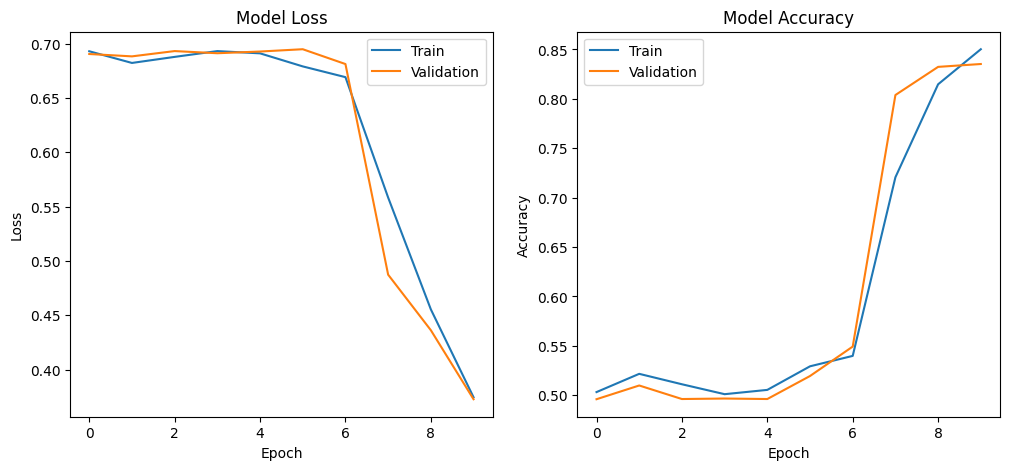

In [31]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.show()


### Evaluating the model

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.4f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

313/313 [==============================] - 9s 27ms/step
Precision: 0.9089
Recall: 0.7482
F1 Score: 0.8207
Confusion Matrix:
[[4583  378]
 [1269 3770]]


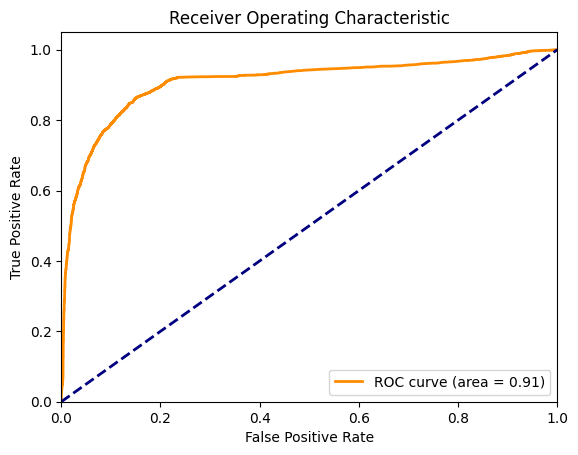

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = roc_auc_score(y_test, y_pred_probs)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [53]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

313/313 [==============================] - 7s 23ms/step - loss: 0.3727 - accuracy: 0.8353
Loss: 0.37272852659225464, Accuracy: 0.8353000283241272


### Saving the model

In [66]:
model.save("IMDB_sentiment_analysis.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Making predictions

In [42]:
predicted = model.predict(x_test)[2]

313/313 [==============================] - 7s 23ms/step


In [59]:
sentiment = 1 if predicted >0.5 else 0
print("predicted :",sentiment)
print("Actual:",y_test[2])

predicted : 0
Actual: 0


In [61]:
def get_sentiment(sen):
  sen=sen.lower()

    # Replace special characters with a space
  sen = re.sub(r'[^a-z0-9\s]', ' ', sen)

    # Remove extra spaces
  sen = re.sub(r'\s+', ' ', sen).strip()

  sequences = tokenizer.texts_to_sequences([sen])
  padded = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')


  predicted =model.predict(padded)
  sentiment = 1 if predicted >0.5 else 0

  if sentiment ==1:
    print("positive")
  else:
    print("negative")

  return sentiment

In [65]:
get_sentiment("This is a fantastic movie and i am looking forward to watch this again")

1/1 [==============================] - 0s 59ms/step
positive


1